## **In this Notebook**

#### Run the first k-means clustering algorithm for the flight delay analysis. 
#### General goal to uncover patterns that aren’t otherwise visible. 
#### Create some visualizations and provide interpretations of the outputs. 
#### Conclude by making proposals for how these insights can help further the analysis.

## **Contents**
### **1. Import Libraries**
### **2. Import Data & Clean and Reprocess as Needed**
### **3. Apply Elbow Technique**
### **4. Select Number of Clusters**
### **5. Run K-Means Algorithm**
### **6. Attach Clusters Column to Dataframe**
### **7. Visualize Clusters with Different Variables**
### **8. Discussion about Clusters**
### **9. Descriptive Statistics for Clusters**
### **10. Impact of Results for Future Analysis**

#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # for k-means algorithm.
import pylab as pl # Convenience module that bulk imports matplotlib.

In [2]:
# Adjust setting to display graphs in notebook without the need to "call" them.

%matplotlib inline

#### 2. Import Data & Clean and Reprocess as Needed

In [3]:
# Set Path

path = path = r'C:\Users\Josh Wattay\anaconda3\Flight Delay Analysis'

df = pd.read_csv(os.path.join(path, '02 Data', 'Clean Data', 'Flights_Clean.csv')) # Import Data Set

In [4]:
df.shape

(500000, 61)

In [5]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-12-02,Comair Inc.,DCA,BTV,False,False,1459,1533.0,34.0,34.0,...,1554.0,1655.0,2.0,1631,26.0,1.0,1.0,1600-1659,2,0.0
1,2018-06-30,Spirit Air Lines,ATL,LAS,False,False,1810,1833.0,23.0,23.0,...,1850.0,1951.0,4.0,1920,35.0,1.0,2.0,1900-1959,7,0.0
2,2018-02-11,Frontier Airlines Inc.,MCI,RSW,False,False,1234,1241.0,7.0,7.0,...,1249.0,1620.0,22.0,1619,23.0,1.0,1.0,1600-1659,5,0.0
3,2018-06-22,United Air Lines Inc.,DEN,CID,False,False,2017,2156.0,99.0,99.0,...,2211.0,33.0,4.0,2303,94.0,1.0,6.0,2300-2359,3,0.0
4,2018-10-19,SkyWest Airlines Inc.,BGM,DTW,False,False,1728,1725.0,0.0,-3.0,...,1733.0,1846.0,7.0,1904,-11.0,0.0,-1.0,1900-1959,2,0.0


#### This data has a lot of categorical variables and therefore I will create a subset to work with on this k-means analysis.

In [9]:
pd.set_option('display.max_rows', 120)

In [10]:
df.dtypes #identify non-numerical variables

FlightDate                                  object
Airline                                     object
Origin                                      object
Dest                                        object
Cancelled                                     bool
Diverted                                      bool
CRSDepTime                                   int64
DepTime                                    float64
DepDelayMinutes                            float64
DepDelay                                   float64
ArrTime                                    float64
ArrDelayMinutes                            float64
AirTime                                    float64
CRSElapsedTime                             float64
ActualElapsedTime                          float64
Distance                                   float64
Year                                         int64
Quarter                                      int64
Month                                        int64
DayofMonth                     

In [11]:
# Create a subset dataframe that removes any columns that are not numerical

df_num = df.select_dtypes(include=['number'])

In [12]:
df_num.head()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
0,1459,1533.0,34.0,34.0,1657.0,26.0,61.0,92.0,84.0,437.0,...,21.0,1554.0,1655.0,2.0,1631,26.0,1.0,1.0,2,0.0
1,1810,1833.0,23.0,23.0,1955.0,35.0,241.0,250.0,262.0,1747.0,...,17.0,1850.0,1951.0,4.0,1920,35.0,1.0,2.0,7,0.0
2,1234,1241.0,7.0,7.0,1642.0,23.0,151.0,165.0,181.0,1155.0,...,8.0,1249.0,1620.0,22.0,1619,23.0,1.0,1.0,5,0.0
3,2017,2156.0,99.0,99.0,37.0,94.0,82.0,106.0,101.0,692.0,...,15.0,2211.0,33.0,4.0,2303,94.0,1.0,6.0,3,0.0
4,1728,1725.0,0.0,-3.0,1853.0,0.0,73.0,96.0,88.0,378.0,...,8.0,1733.0,1846.0,7.0,1904,-11.0,0.0,-1.0,2,0.0


In [13]:
df_num.shape

(500000, 41)

In [17]:
df_num.isnull().sum()

CRSDepTime                             0
DepTime                            14024
DepDelayMinutes                    14046
DepDelay                           14046
ArrTime                            14412
ArrDelayMinutes                    15443
AirTime                            15552
CRSElapsedTime                         0
ActualElapsedTime                  15433
Distance                               0
Year                                   0
Quarter                                0
Month                                  0
DayofMonth                             0
DayOfWeek                              0
DOT_ID_Marketing_Airline               0
Flight_Number_Marketing_Airline        0
DOT_ID_Operating_Airline               0
Flight_Number_Operating_Airline        0
OriginAirportID                        0
OriginAirportSeqID                     0
OriginCityMarketID                     0
OriginStateFips                        0
OriginWac                              0
DestAirportID   

In [18]:
# Address null values

# Columns I want to clean
subset_columns = ['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 
                  'ActualElapsedTime', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 
                 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DivAirportLandings']

# Function to fill NaNs with median value
def fill_na_with_median(df_num, columns):
    for column in columns:
        median_value = df_num[column].median()
        df_num[column].fillna(median_value, inplace=True)

# Fill NaNs in the specified subset of columns
fill_na_with_median(df_num, subset_columns)

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_14948\1473474538.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_num[column].fillna(median_value, inplace=True)


In [19]:
df_num.isnull().sum()

CRSDepTime                         0
DepTime                            0
DepDelayMinutes                    0
DepDelay                           0
ArrTime                            0
ArrDelayMinutes                    0
AirTime                            0
CRSElapsedTime                     0
ActualElapsedTime                  0
Distance                           0
Year                               0
Quarter                            0
Month                              0
DayofMonth                         0
DayOfWeek                          0
DOT_ID_Marketing_Airline           0
Flight_Number_Marketing_Airline    0
DOT_ID_Operating_Airline           0
Flight_Number_Operating_Airline    0
OriginAirportID                    0
OriginAirportSeqID                 0
OriginCityMarketID                 0
OriginStateFips                    0
OriginWac                          0
DestAirportID                      0
DestAirportSeqID                   0
DestCityMarketID                   0
D

#### 3. Apply Elbow Technique

In [21]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
# Create a score that represents a rate of variation for the given cluster option
scores = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

# Display the scores
print(scores)

[-2.326894291839495e+16, -1.4085675566401258e+16, -8848201244617480.0, -4924208698340530.0, -4216080163507023.0, -3485971180618953.5, -3038750992714287.0, -2389557404978873.0, -2046620647399807.0]


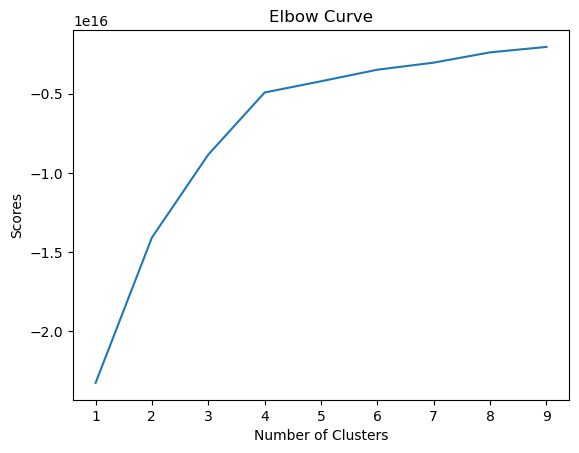

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Scores')
pl.title('Elbow Curve')
pl.show()

The Scores begin to level off after the number of clusters surpases a value of 4. 

#### 4. Select Number of Clusters

#### As stated and visualized above, the Scores level off once the Number of Clusters passes a value of 4. 
#### Therefore, by applying the Elbow Technique, I will select 4 Clusters for this k-means analysis.
#### This will ensure that there is enough variation between the Clusters to identify differences between the clusters.
#### Selecting more than 4 Clusters in this instance would potentially result in several Clusters being too similar with fewer insights to glean from each cluster.

#### 5. Run K-Means Algorithm

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

KMeans(n_clusters=4)

#### 6. Attach Clusters column to Dataframe

In [27]:
df_num['clusters'] = kmeans.fit_predict(df_num)

In [28]:
df_num.head()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings,clusters
0,1459,1533.0,34.0,34.0,1657.0,26.0,61.0,92.0,84.0,437.0,...,1554.0,1655.0,2.0,1631,26.0,1.0,1.0,2,0.0,2
1,1810,1833.0,23.0,23.0,1955.0,35.0,241.0,250.0,262.0,1747.0,...,1850.0,1951.0,4.0,1920,35.0,1.0,2.0,7,0.0,3
2,1234,1241.0,7.0,7.0,1642.0,23.0,151.0,165.0,181.0,1155.0,...,1249.0,1620.0,22.0,1619,23.0,1.0,1.0,5,0.0,0
3,2017,2156.0,99.0,99.0,37.0,94.0,82.0,106.0,101.0,692.0,...,2211.0,33.0,4.0,2303,94.0,1.0,6.0,3,0.0,2
4,1728,1725.0,0.0,-3.0,1853.0,0.0,73.0,96.0,88.0,378.0,...,1733.0,1846.0,7.0,1904,-11.0,0.0,-1.0,2,0.0,2


In [29]:
df_num['clusters'].value_counts()

clusters
0    131461
1    124106
3    123811
2    120622
Name: count, dtype: int64

This is a fairly equitable distribution of volume for each cluster.

#### 7. Visualize Clusters with Different Variables

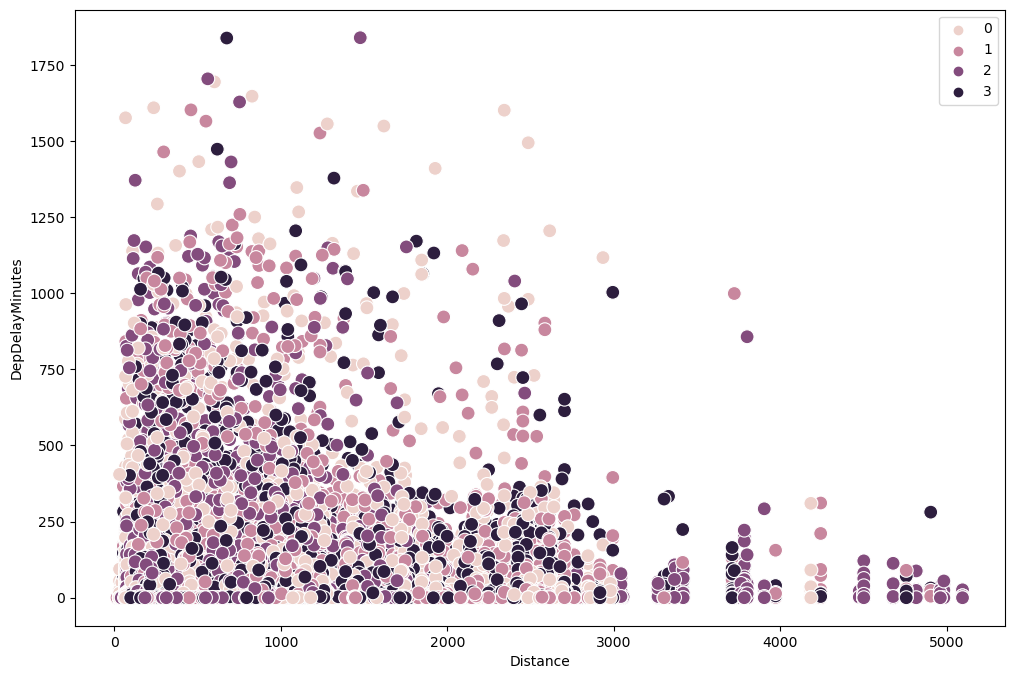

In [30]:
# Plot the clusters for the "Distance" and "DepDelayMinutes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Distance'], y=df_num['DepDelayMinutes'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Distance') # Label x-axis.
plt.ylabel('DepDelayMinutes') # Label y-axis.
plt.show()

#### When visualizing the clusters based on Distance (x) and Departure Delay in Minutes (y)
#### there appears to be a relatively mixed distribution amongst the clusters. 
#### Therefore I will need to continue looking for other variables.

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


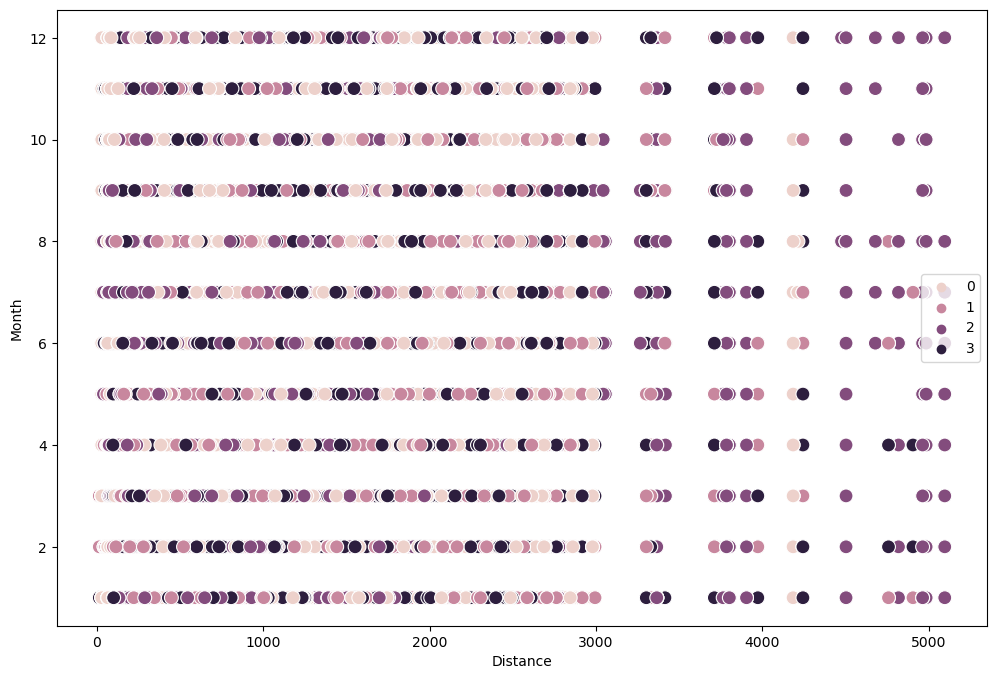

In [31]:
# Plot the clusters for the "Distance" and "Month" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Distance'], y=df_num['Month'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Distance') # Label x-axis.
plt.ylabel('Month') # Label y-axis.
plt.show()

#### When visualizing the clusters based on Distance (x) and Month (y)
#### there appears to be a relatively mixed distribution amongst the clusters. 
#### Therefore I will need to continue looking for other variables.

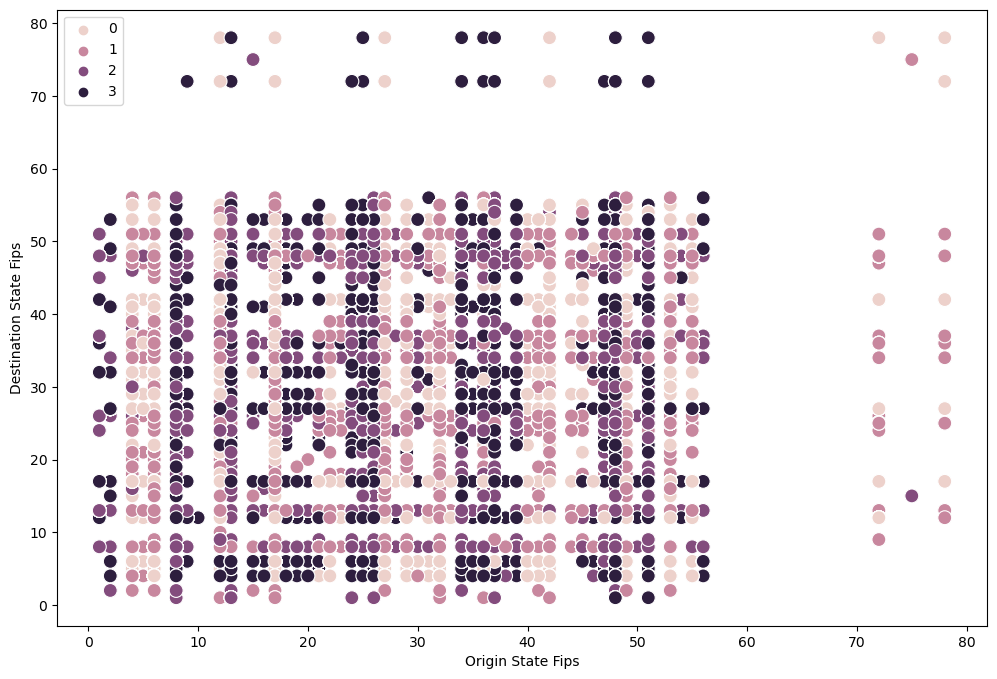

In [32]:
# Plot the clusters for the "OriginStateFips" and "DestStateFips" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['OriginStateFips'], y=df_num['DestStateFips'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Origin State Fips') # Label x-axis.
plt.ylabel('Destination State Fips') # Label y-axis.
plt.show()

#### Interestingly enough, when visualizing origin state fips and destination state fips codes (fips codes start alphabetically with Alabama as 1 and Wyoming as 56, there are other territories beyond 56) the clusters start to display almost a woven pattern with a bit more separation between clusters.

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


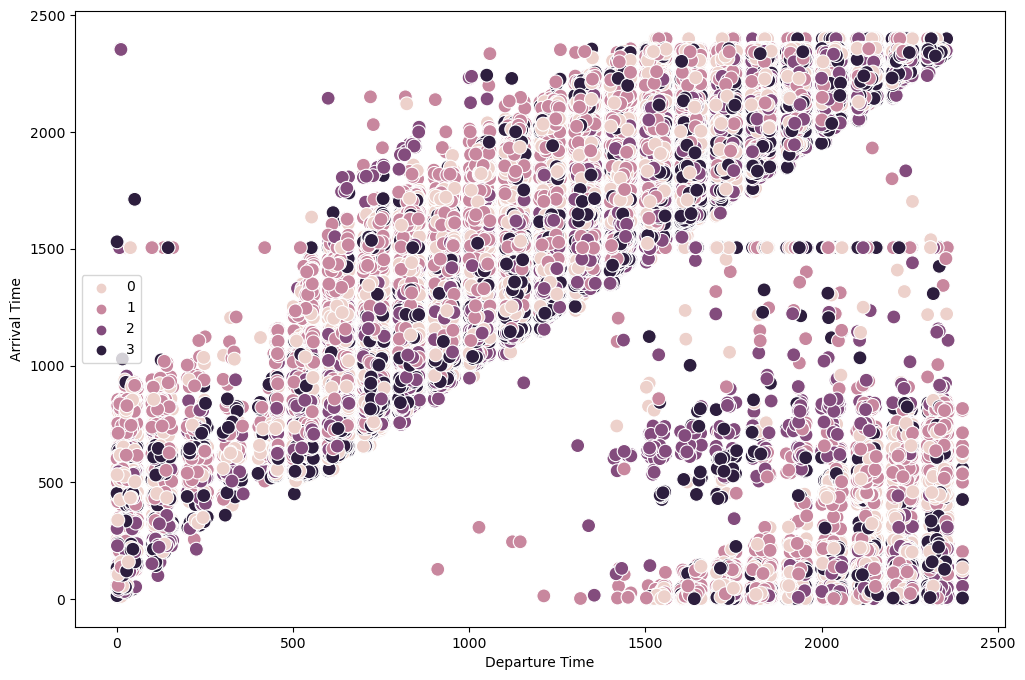

In [33]:
# Plot the clusters for the "DepTime" and "ArrTime" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['DepTime'], y=df_num['ArrTime'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Departure Time') # Label x-axis.
plt.ylabel('Arrival Time') # Label y-axis.
plt.show()

#### Again, fairly mixed distribution of the clusters.

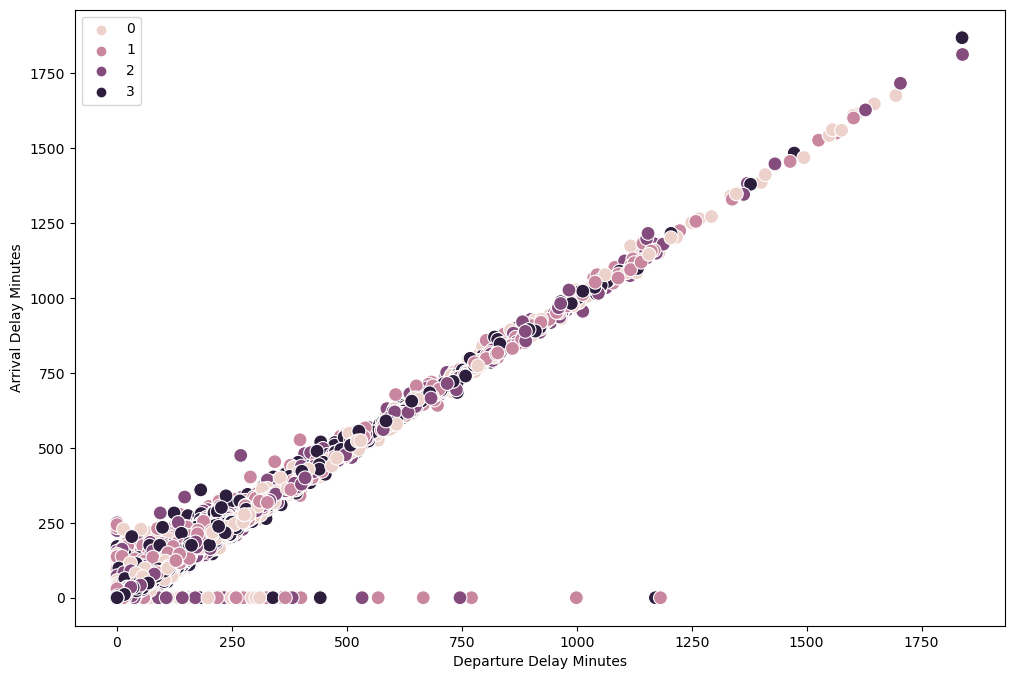

In [34]:
# Plot the clusters for the "DepDelayMinutes" and "ArrDelayMinutes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['DepDelayMinutes'], y=df_num['ArrDelayMinutes'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Departure Delay Minutes') # Label x-axis.
plt.ylabel('Arrival Delay Minutes') # Label y-axis.
plt.show()

#### The clusters here remain mixed together, but it does appear that the Cluster 3 is more concentrated below a departure and arrival delay of 750 minutues.

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


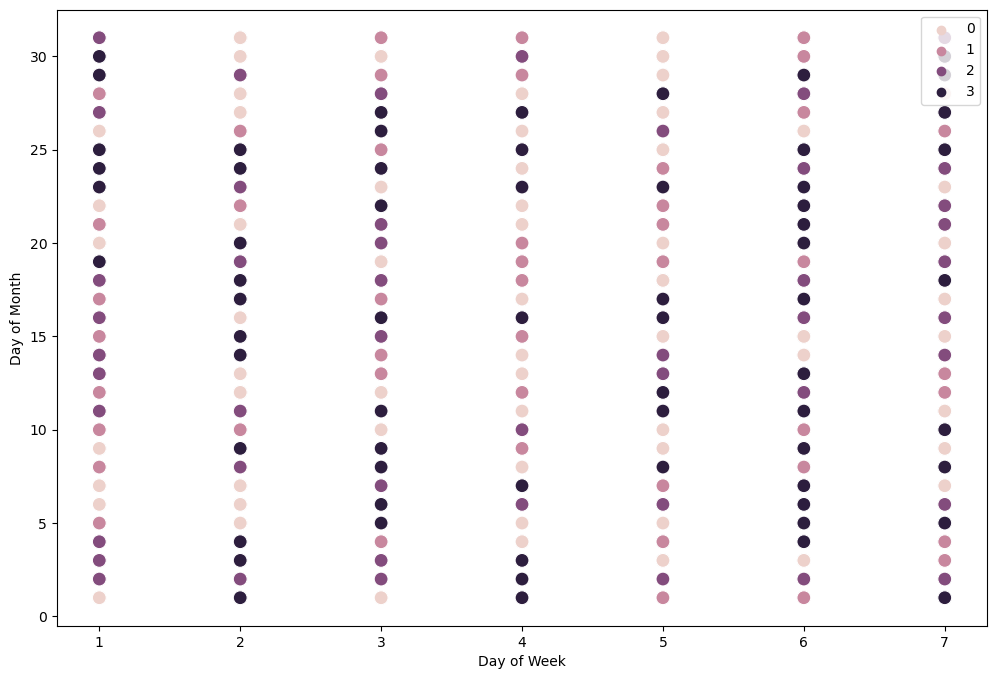

In [36]:
# Plot the clusters for the "DayOfWeek" and "DayofMonth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['DayOfWeek'], y=df_num['DayofMonth'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # removes the grid from the background.
plt.xlabel('Day of Week') # Label x-axis.
plt.ylabel('Day of Month') # Label y-axis.
plt.show()

#### 8. Discussion of Clusters

#### Based upon this initial visualization of the clusters across multiple variables, the clusters appear to make no sense, as they are evenly dispersed at random intervals on the scatterplots visualized above. Therefore I will have to explore the data further to continue to find correlations. I am eager to see what the descriptive summary statistics will state about the clusters, as that may give me some much needed insights.

#### 9. Descriptive Statistics for Clusters

In [38]:
# Rename Clusters using loc function for ease of reference on descriptive stats

df.loc[df_num['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df_num['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df_num['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df_num['clusters'] == 0, 'cluster'] = 'light pink'

In [39]:
# Use groupby function to display descriptive statistics of the clusters

df.groupby('cluster').agg({'DepDelayMinutes':['mean', 'median'], 
                         'Distance':['mean', 'median'], 
                         'ArrDelayMinutes':['mean', 'median'],
                          'Year':['mean', 'median'],
                          'DepTime':['mean', 'median'],
                          'ArrTime':['mean', 'median'], 
                          'CRSElapsedTime':['mean', 'median'],
                          'ActualElapsedTime':['mean', 'median'],
                          'Quarter':['mean', 'median'],
                          'Month':['mean', 'median'],
                          'DistanceGroup':['mean', 'median']})

DepDelayMinutes           Distance        ArrDelayMinutes         \
                       mean median        mean median            mean median   
cluster                                                                        
dark purple       12.909597    0.0  844.085574  686.0       12.885144    0.0   
light pink        12.084492    0.0  806.382326  646.0       11.980054    0.0   
pink              12.554731    0.0  842.704970  683.0       12.602769    0.0   
purple            13.007981    0.0  623.955240  547.0       13.163345    0.0   

                    Year              DepTime          ... CRSElapsedTime  \
                    mean  median         mean  median  ...           mean   
cluster                                                ...                  
dark purple  2020.009579  2020.0  1351.221307  1339.0  ...     148.933907   
light pink   2019.971010  2020.0  1329.976011  1325.0  ...     141.277367   
pink         2020.003658  2020.0  1299.444739  1300.0  ...     143.644739   
purple       2020.017998  2020.0  1330.931027  1325.0  ...     120.766726   

                   ActualElapsedTime          Quarter            Month         \
            median              mean median      mean median      mean median   
cluster                                                                         
dark purple  130.0        143.301371  124.0  2.397517    2.0  6.161706    6.0   
light pink   122.0        135.565560  117.0  2.383254    2.0  6.119153    6.0   
pink         129.0        138.156306  123.0  2.397950    2.0  6.165391    6.0   
purple       110.0        115.487761  105.0  2.398576    2.0  6.169778    6.0   

            DistanceGroup         
                     mean median  
cluster                           
dark purple      3.847421    3.0  
light pink       3.720792    3.0  
pink             3.840685    3.0  
purple           2.954975    3.0  

[4 rows x 22 columns]

In [40]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

In [41]:
# Use groupby function to display descriptive statistics of the clusters

df.groupby('cluster').agg({'DepDelayMinutes':['mean', 'median'], 
                         'Distance':['mean', 'median'], 
                         'ArrDelayMinutes':['mean', 'median'],
                          'Year':['mean', 'median'],
                          'DepTime':['mean', 'median'],
                          'ArrTime':['mean', 'median'], 
                          'CRSElapsedTime':['mean', 'median'],
                          'ActualElapsedTime':['mean', 'median'],
                          'Quarter':['mean', 'median'],
                          'Month':['mean', 'median'],
                          'DistanceGroup':['mean', 'median']})

DepDelayMinutes           Distance        ArrDelayMinutes         \
                       mean median        mean median            mean median   
cluster                                                                        
dark purple       12.909597    0.0  844.085574  686.0       12.885144    0.0   
light pink        12.084492    0.0  806.382326  646.0       11.980054    0.0   
pink              12.554731    0.0  842.704970  683.0       12.602769    0.0   
purple            13.007981    0.0  623.955240  547.0       13.163345    0.0   

                    Year              DepTime              ArrTime          \
                    mean  median         mean  median         mean  median   
cluster                                                                      
dark purple  2020.009579  2020.0  1351.221307  1339.0  1475.392706  1503.0   
light pink   2019.971010  2020.0  1329.976011  1325.0  1472.561851  1508.0   
pink         2020.003658  2020.0  1299.444739  1300.0  1460.078221  1507.0   
purple       2020.017998  2020.0  1330.931027  1325.0  1465.541106  1501.0   

            CRSElapsedTime        ActualElapsedTime          Quarter         \
                      mean median              mean median      mean median   
cluster                                                                       
dark purple     148.933907  130.0        143.301371  124.0  2.397517    2.0   
light pink      141.277367  122.0        135.565560  117.0  2.383254    2.0   
pink            143.644739  129.0        138.156306  123.0  2.397950    2.0   
purple          120.766726  110.0        115.487761  105.0  2.398576    2.0   

                Month        DistanceGroup         
                 mean median          mean median  
cluster                                            
dark purple  6.161706    6.0      3.847421    3.0  
light pink   6.119153    6.0      3.720792    3.0  
pink         6.165391    6.0      3.840685    3.0  
purple       6.169778    6.0      2.954975    3.0

#### 10. Impact of Results for Future Analysis

#### While the visualization of the clusters did not produce the desired result of immediate insight into the difference between the clusters, the descriptive statistics do demonstrate a noticeable pattern where the Purple Cluster (aka Cluster 2) has a shorter mean and median for Distance, CRS Elapsed Time, Actual Elapsed Time, and Distance Group relative to the Dark Purple Cluster (aka Cluster 3). 

#### The impact of such a result leads me to believe that there is a slight and yet noticeable difference between the clusters based on distance which would then alter the length of the flight. Whats more, is that the the Purple Cluster has median distance of 547 and a mean Departure Delay of 13.007 minutes, while the Dark Purple Cluster has a median distance of 686 miles and a mean Departure Delay of 12.909 minutes. The difference is only roughly 6 seconds between the mean of each group, which goes to show how minor the difference truly is. 

#### At this point in my analysis, I have yet to group these statistics based on Airline, and I think moving forward in future analysis, I will be looking more closely at how each Airlines performance is different to continue hunting for insights.